# 训练优化算法

#### 是一个由两项内容组成的函数：
- 一个是损失项，用于衡量模型与数据的拟合度；（loss函数）->  loss(data|model)
- 一个是正则化项，用于衡量模型复杂度；（L1、L2）->complexity(model)
    - 泛化曲线显示该模型与训练集中的数据过拟合; L1
    - 根据奥卡姆剃刀定律(去做‘用较少的东西，同样可以做好的事情’)，或许我们可以通过降低复杂模型的复杂度来防止过拟合，这种原则称为正则化; L2
    - 表达式：minimize(loss(data|model)+complexity(model))
        - 其中，不能一味追求loss函数最小化即“经验风险最小化”；complexity(model)作为惩罚项即“结构风险最小化”；两项平衡解决（数据&结构平衡）过拟合问题；
        - complexity(model)
            - 将模型复杂度作为模型中所有特征的权重的函数。Model complexity as a function of the weights of all the features in the model.
            - 将模型复杂度作为具有非零权重的特征总数的函数。Model complexity as a function of the total number of features with nonzero weights.
    - 正则化率lambda用于调节模型复杂程度的系数，也叫做惩罚项：lambad*complexity(model)
        - 表达式升级：minimize(loss(data|model))+lambda*complexity(model)
            - lambda变大，会增强正则化，模型就简单；
            - lambda变小，会降低正则化，模型就复杂；
            - lambda 设为 0 可彻底取消正则化。（在这种情况下，训练的唯一目的将是最小化损失，而这样做会使过拟合的风险达到最高)


# 线性回归的loss是平方损失函数；
# 逻辑回归的loss是对数损失函数，是似然函数的负对数；
- 为了使逻辑回归的值出在【0，1】区间，引用了数学性质极其明显的S曲线：$\frac {1}{1+e^{-z}}$
- 其中：Z是逻辑回归训练的线性层输出，是$b+w_1x_1+w_2x_2+ \cdots +w_nx_n$(w是权重，x是特定样本的特征值)；y是逻辑回归模型针对特定样本的输出。
- Z也是对数几率，因为$\frac {1}{1+e^{-z}}$的反函数是：z= log(y/（1-y）) 

Text(0,0.5,'$y = \\frac {1}{1 + e^{-z}}$')

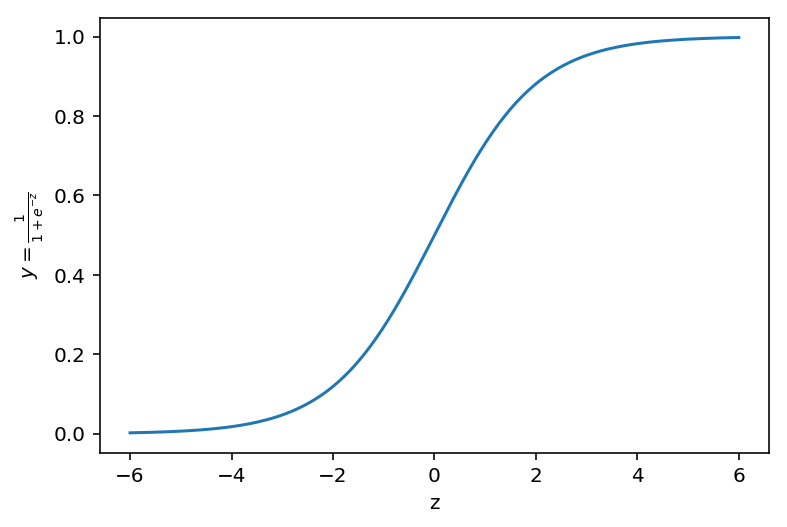

In [25]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-6, 6, 300)
y = 1 / (1 + np.e ** (-z))

plt.plot(z, y)
plt.xlabel('z')
plt.ylabel(r'$y = \frac {1}{1 + e^{-z}}$')

max z is [       -inf -4.58496748 -3.8815638  -3.4657359  -3.16758253 -2.93385687
 -2.74084002 -2.57587843 -2.43141796 -2.30258509 -2.18605128 -2.07944154
 -1.98100147 -1.88939794 -1.80359393 -1.7227666  -1.64625189 -1.5735059
 -1.5040774  -1.43758766 -1.37371558 -1.31218639 -1.25276297 -1.19523912
 -1.13943428 -1.08518927 -1.0323629  -0.98082925 -0.93047537 -0.88119941
 -0.83290912 -0.7855205  -0.73895672 -0.69314718 -0.64802675 -0.60353502
 -0.55961579 -0.51621647 -0.4732877  -0.43078292 -0.38865799 -0.34687094
 -0.30538165 -0.26415158 -0.22314355 -0.18232156 -0.14165052 -0.10109612
 -0.06062462 -0.02020271  0.02020271  0.06062462  0.10109612  0.14165052
  0.18232156  0.22314355  0.26415158  0.30538165  0.34687094  0.38865799
  0.43078292  0.4732877   0.51621647  0.55961579  0.60353502  0.64802675
  0.69314718  0.73895672  0.7855205   0.83290912  0.88119941  0.93047537
  0.98082925  1.0323629   1.08518927  1.13943428  1.19523912  1.25276297
  1.31218639  1.37371558  1.43758766  1.504

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Text(0,0.5,'y = $log_2(\\frac {y}{(1-y)})$')

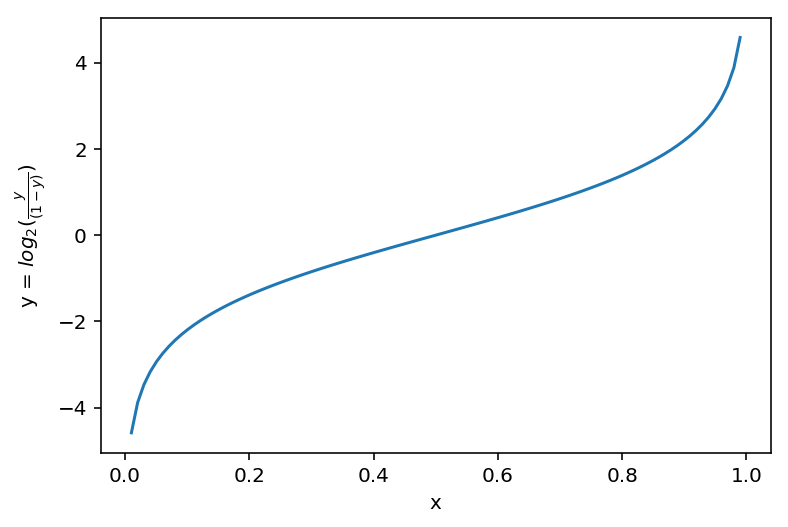

In [37]:
y = np.linspace(0, 1, 100)
z = np.log(y / (1 - y))

plt.plot(y, z)
plt.xlabel('x')
plt.ylabel(r'y = $log_2(\frac {y}{(1-y)})$')

In [0]:
# 分桶预测（bucketing） http://d0evi1.com/buckettest/
    

## L0 L1 L2 正则化 regularzation

- 规则化函数Ω(w)也有很多种选择，一般是模型复杂度的单调递增函数，模型越复杂，规则化值就越大。比如，规则化项可以是模型参数向量的范数。
聚集在：零范数、一范数、二范数、迹范数、Frobenius范数和核范数

    - L0范数是指向量中非0的元素的个数。如果我们用L0范数来规则化一个参数矩阵W的话，就是希望W的大部分元素都是0。这太直观了，太露骨了吧，换句话说，让参数W是稀疏的。
    
    - L1范数是指向量中各个元素绝对值之和，也有个美称叫“稀疏规则算子”（Lasso regularization）。

    - L2范数是指向量各元素的平方和然后求平方根。我们让L2范数的规则项||W||2最小，可以使得W的每个元素都很小，都接近于0，但与L1范数不同，它不会让它等于0，而是接近于0，这里是有很大的区别的哦。而越小的参数说明模型越简单，越简单的模型则越不容易产生过拟合现象。为什么越小的参数说明模型越简单？我也不懂，我的理解是：限制了参数很小，实际上就限制了多项式某些分量的影响很小（看上面线性回归的模型的那个拟合的图），这样就相当于减少参数个数。


In [2]:
# ReLU是线性修正
- 是purelin的折线版。它的作用是如果计算出的值小于0，就让它等于0，否则保持原来的值不变。这是一种简单粗暴地强制某些数据为0的方法，然而经实践证明，训练后的网络完全具备适度的稀疏性。而且训练后的可视化效果和传统方式预训练出的效果很相似，这也说明了ReLU具备引导适度稀疏的能力。 


SyntaxError: invalid character in identifier (<ipython-input-2-416f4264e95f>, line 2)